In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.DataFrame.iteritems = pd.DataFrame.items

In [2]:
def plot_histograms(dataframe, bins=10, figsize=(15, 10)):
    ### plots histograms for every numerical feature of a dataset ### 
    num_columns = len(dataframe.columns)
    
    num_rows = 3
    num_cols = 3

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    axes = axes.flatten()
    
    for i, column in enumerate(dataframe.columns):
        ax = axes[i]
        
        dataframe[column].plot(kind='hist', bins=bins, ax=ax, edgecolor='black', color='seagreen')
        
        ax.set_title(f'Distribution - {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    fig.tight_layout()

In [3]:
churn = pd.read_csv('churn_clean.csv')

In [4]:
churn = churn.drop(columns = 'Unnamed: 0')

In [5]:
churn.head()

,credit_score,country,gender,age,tenure_years,balance,number_of_products,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit_score        10000 non-null  int64  
 1   country             10000 non-null  object 
 2   gender              10000 non-null  object 
 3   age                 10000 non-null  int64  
 4   tenure_years        10000 non-null  int64  
 5   balance             10000 non-null  float64
 6   number_of_products  10000 non-null  int64  
 7   credit_card         10000 non-null  int64  
 8   active_member       10000 non-null  int64  
 9   estimated_salary    10000 non-null  float64
 10  churn               10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


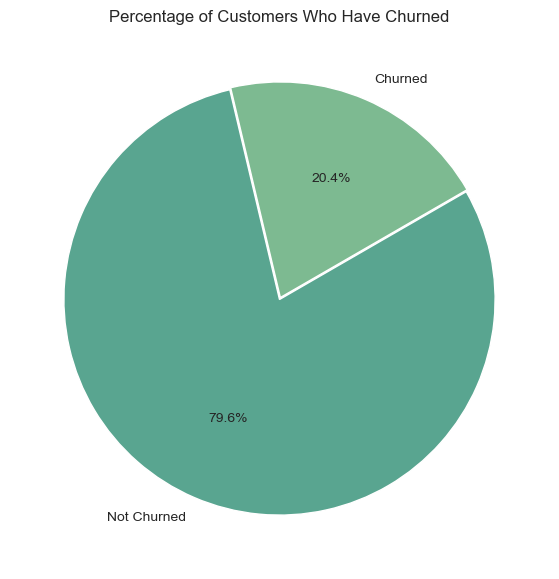

In [7]:
churn_customers = churn[churn['churn'] == 1].shape[0]

not_churn = churn.shape[0] - churn_customers
labels = ['Churned', 'Not Churned']
sizes = [churn_customers, not_churn]
colors = sns.color_palette('crest')[0:5]
explode = (0.01, 0)

plt.figure(figsize = (10,7))
sns.set_style('darkgrid')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
plt.title('Percentage of Customers Who Have Churned')
plt.savefig('churn_pie.png',bbox_inches = 'tight', pad_inches = 1)

1. 79.6% of our customers have not churned.
2. 20.4% of our customers have, at some point, churned. 

A clear imbalance. 

In [8]:
churn_numeric = churn.drop(columns = ['country', 'gender'])

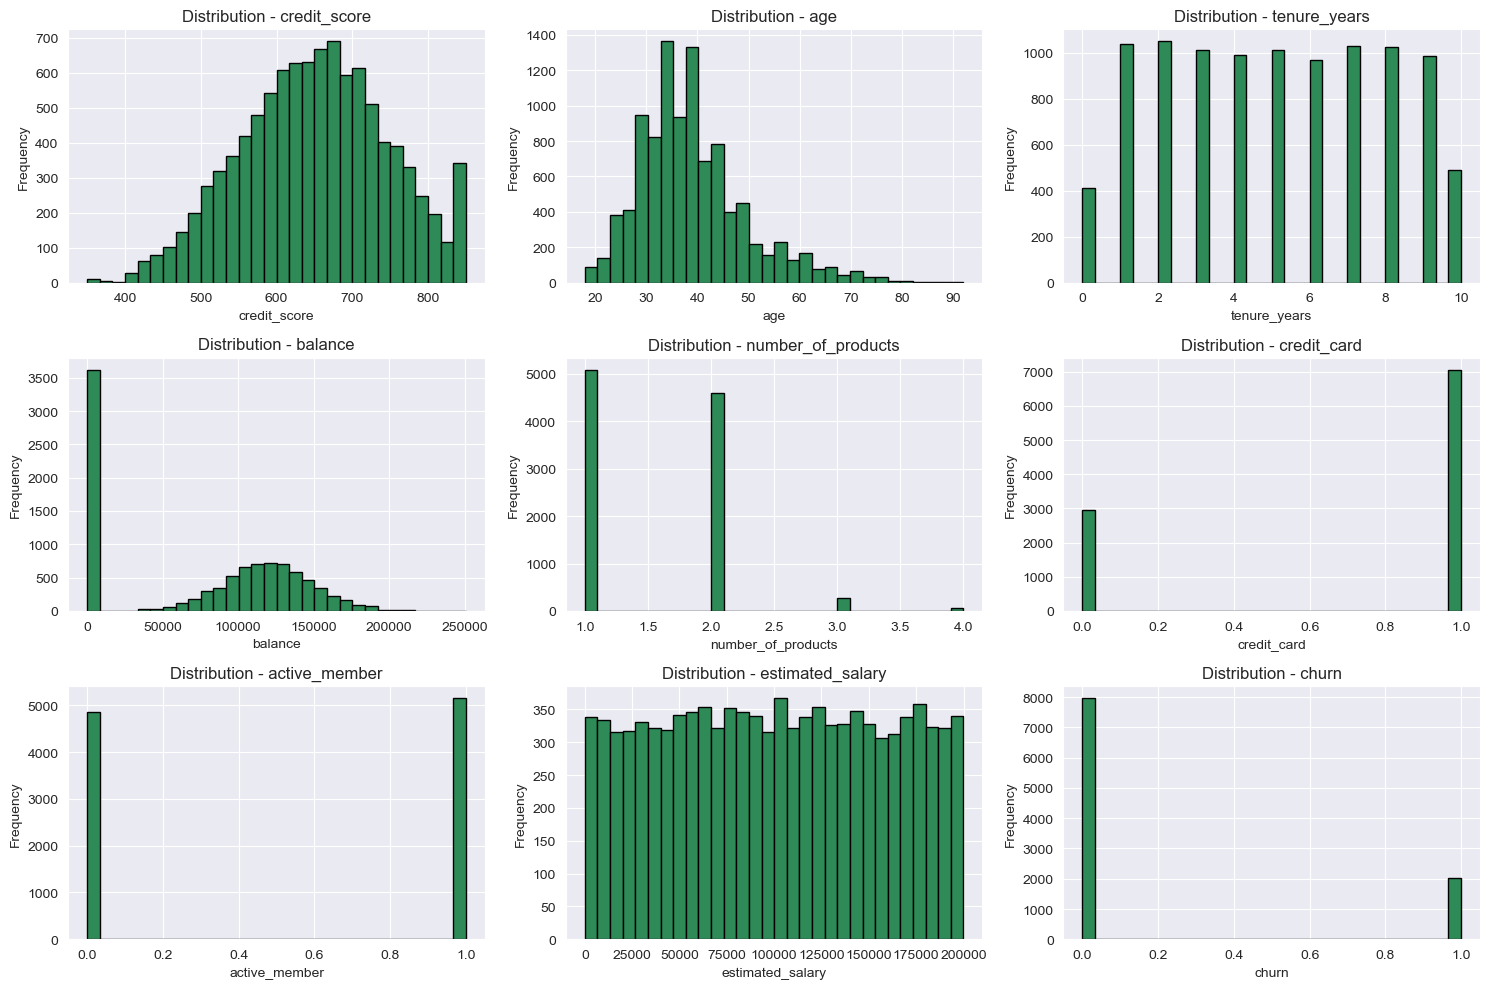

In [9]:
sns.set_style('darkgrid')
plot_histograms(churn_numeric, bins = 30)
plt.savefig('hist_churn.png',bbox_inches = 'tight', pad_inches = 1)

There are a lot of binary values here. The 'credit_card' variable is either 0 or 1, indicating whether a customer had a credit card (1) or not (0). The 'active_member' variable indicates whether they are currently a customer of the bank, and we observe a fairly even split there.

The 'balance' variable is interesting. We see a high imbalance in customers who don't have any money in the bank, but then a normal distribution for customers who do have money in the bank.

'age' and 'credit_score' look fairly normal. Age does have a slight left skew, and the credit score is a bit imbalanced towards the right, with more super-high credit customers than super-low credit customers.

The 'tenure' variable appears evenly distributed, and most customers have one or two products with the bank.

Our target variable, 'churn,' is imbalanced.

In [10]:
round(churn.groupby('country')['age'].mean(),0)

country
France     39.0
Germany    40.0
Spain      39.0
Name: age, dtype: float64

In [11]:
round(churn.groupby('active_member')['age'].mean(),0)

active_member
0    38.0
1    40.0
Name: age, dtype: float64

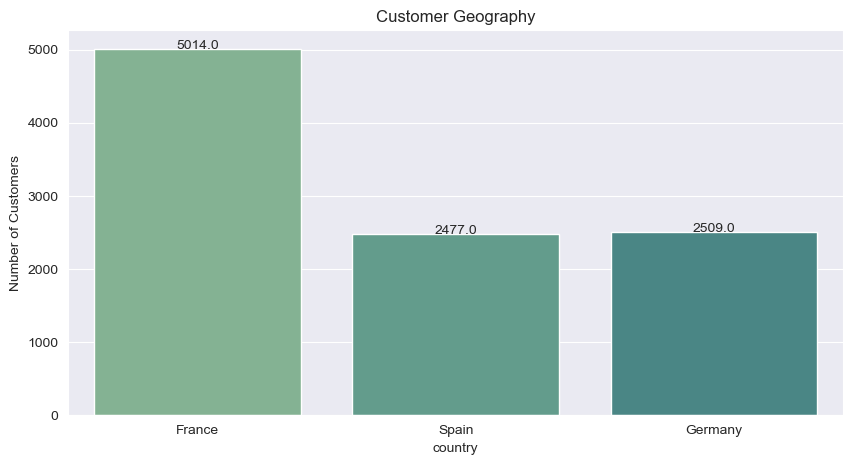

In [12]:
plt.figure(figsize = (10,5))
sns.set_palette('crest')
ax6 = sns.countplot(data = churn, x = 'country')
plt.ylabel('Number of Customers')
plt.title('Customer Geography')
plt.savefig('customer_geography.png',bbox_inches = 'tight', pad_inches = 1)
for p in ax6.patches:
    height = p.get_height()
    ax6.text(p.get_x() + p.get_width()/2., height + 0.1, f'{height}', ha="center")

1. 50.14% of our data comes from French customers.
2. 25.09% of our data comes from German customers.
3. 24.77% of our data comes from Spanish customers.

Text(0.5, 1.0, 'Age and Credit Score vs Churn')

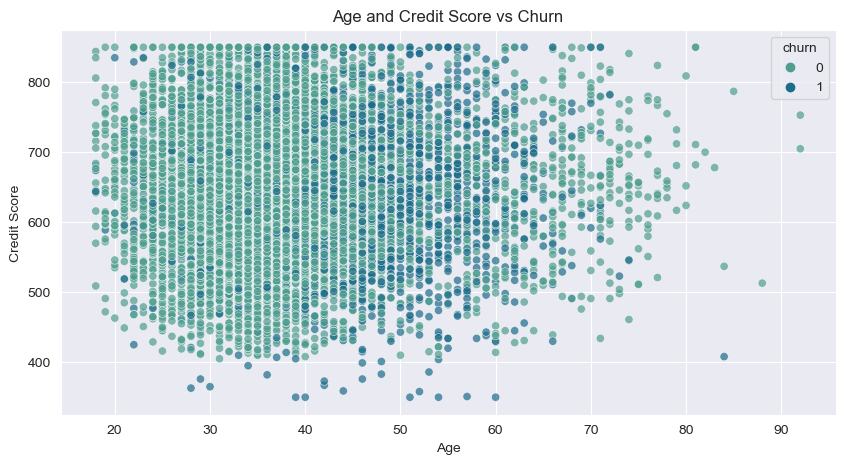

In [13]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = churn, x = 'age', y = 'credit_score', hue = 'churn', palette = 'crest', alpha = 0.7)
plt.ylabel('Credit Score')
plt.xlabel('Age')
plt.title('Age and Credit Score vs Churn')

It doesn't appear that there is any discernible relationship between age, credit score, and churn. The only thing I can take away from this is that customers below 400 tend to always churn, but it's a low sample size. I can't make any definitive claims.

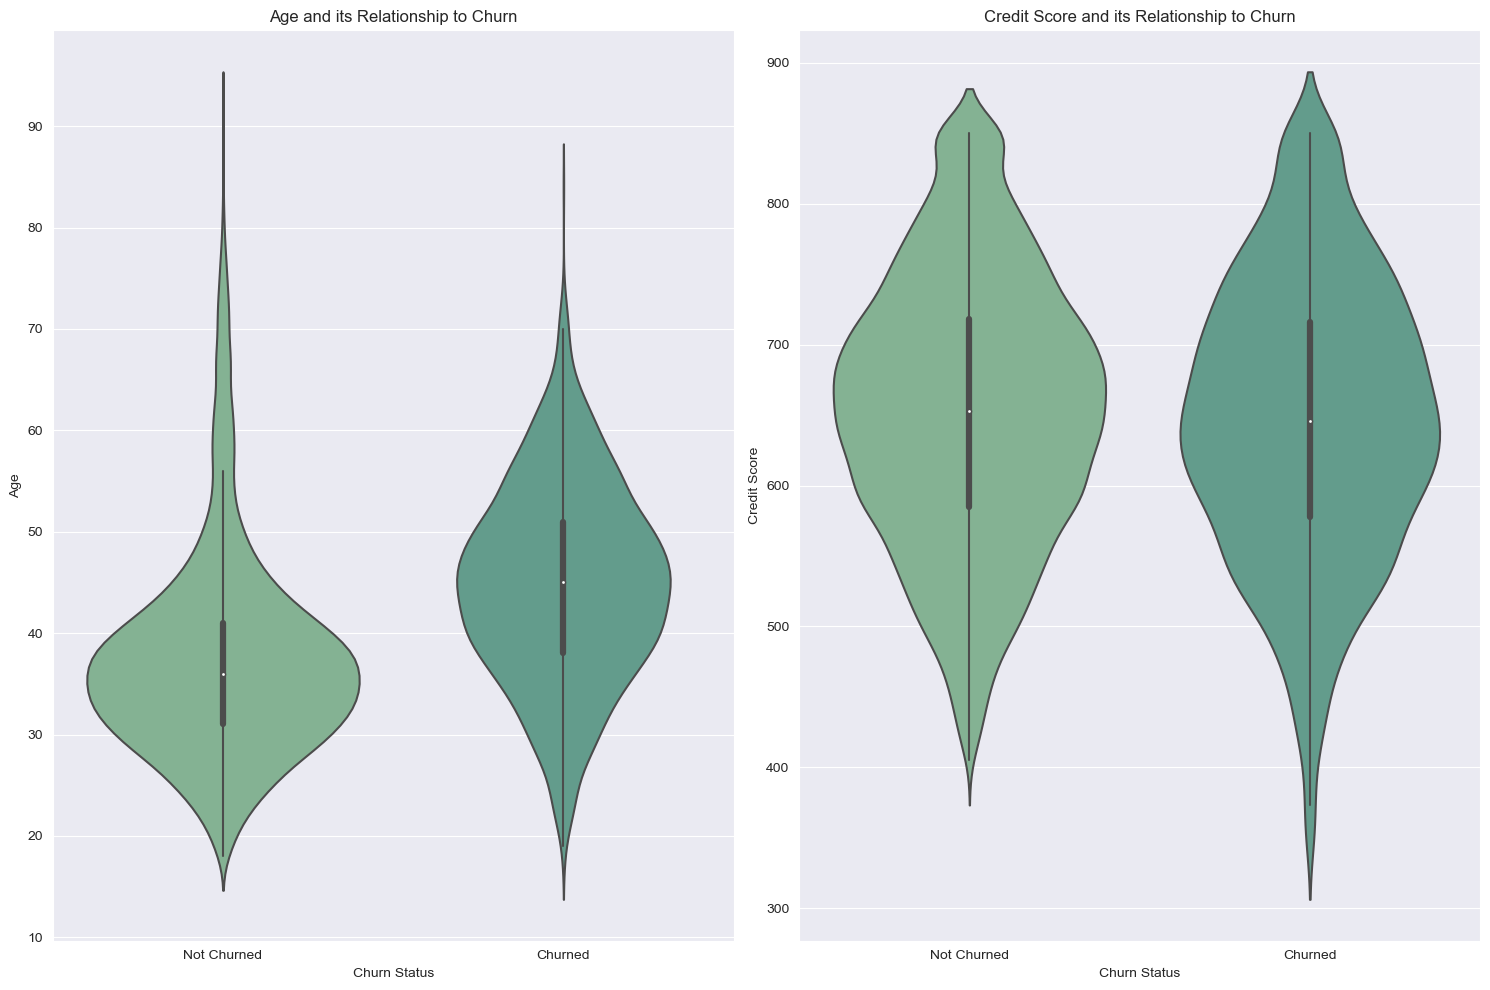

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,10))

plt.subplots_adjust(hspace=0.2)

plt.subplot(1, 2, 1)
sns.violinplot(data = churn, x = 'churn', y = 'age', alpha = 0.6)
plt.title('Age and its Relationship to Churn')
plt.ylabel('Age')
plt.xlabel('Churn Status')
plt.xticks([0,1],['Not Churned', 'Churned'])


plt.subplot(1, 2, 2)

sns.violinplot(data = churn, x = 'churn', y = 'credit_score')
plt.title('Credit Score and its Relationship to Churn')
plt.ylabel('Credit Score')
plt.xlabel('Churn Status')
plt.xticks([0,1],['Not Churned', 'Churned'])

plt.tight_layout()


plt.savefig('creditscore_age_v_churn.png',bbox_inches = 'tight', pad_inches = 1)



Looks like customers who churn are a tad older than those who don't. 

I'm not sure if credit score tells us much. Density of our credit score data points appears close, as do the medians and quartiles. I would have thought credit score do be a better indicator of churn but it doesn't seem like that's the case so far. 

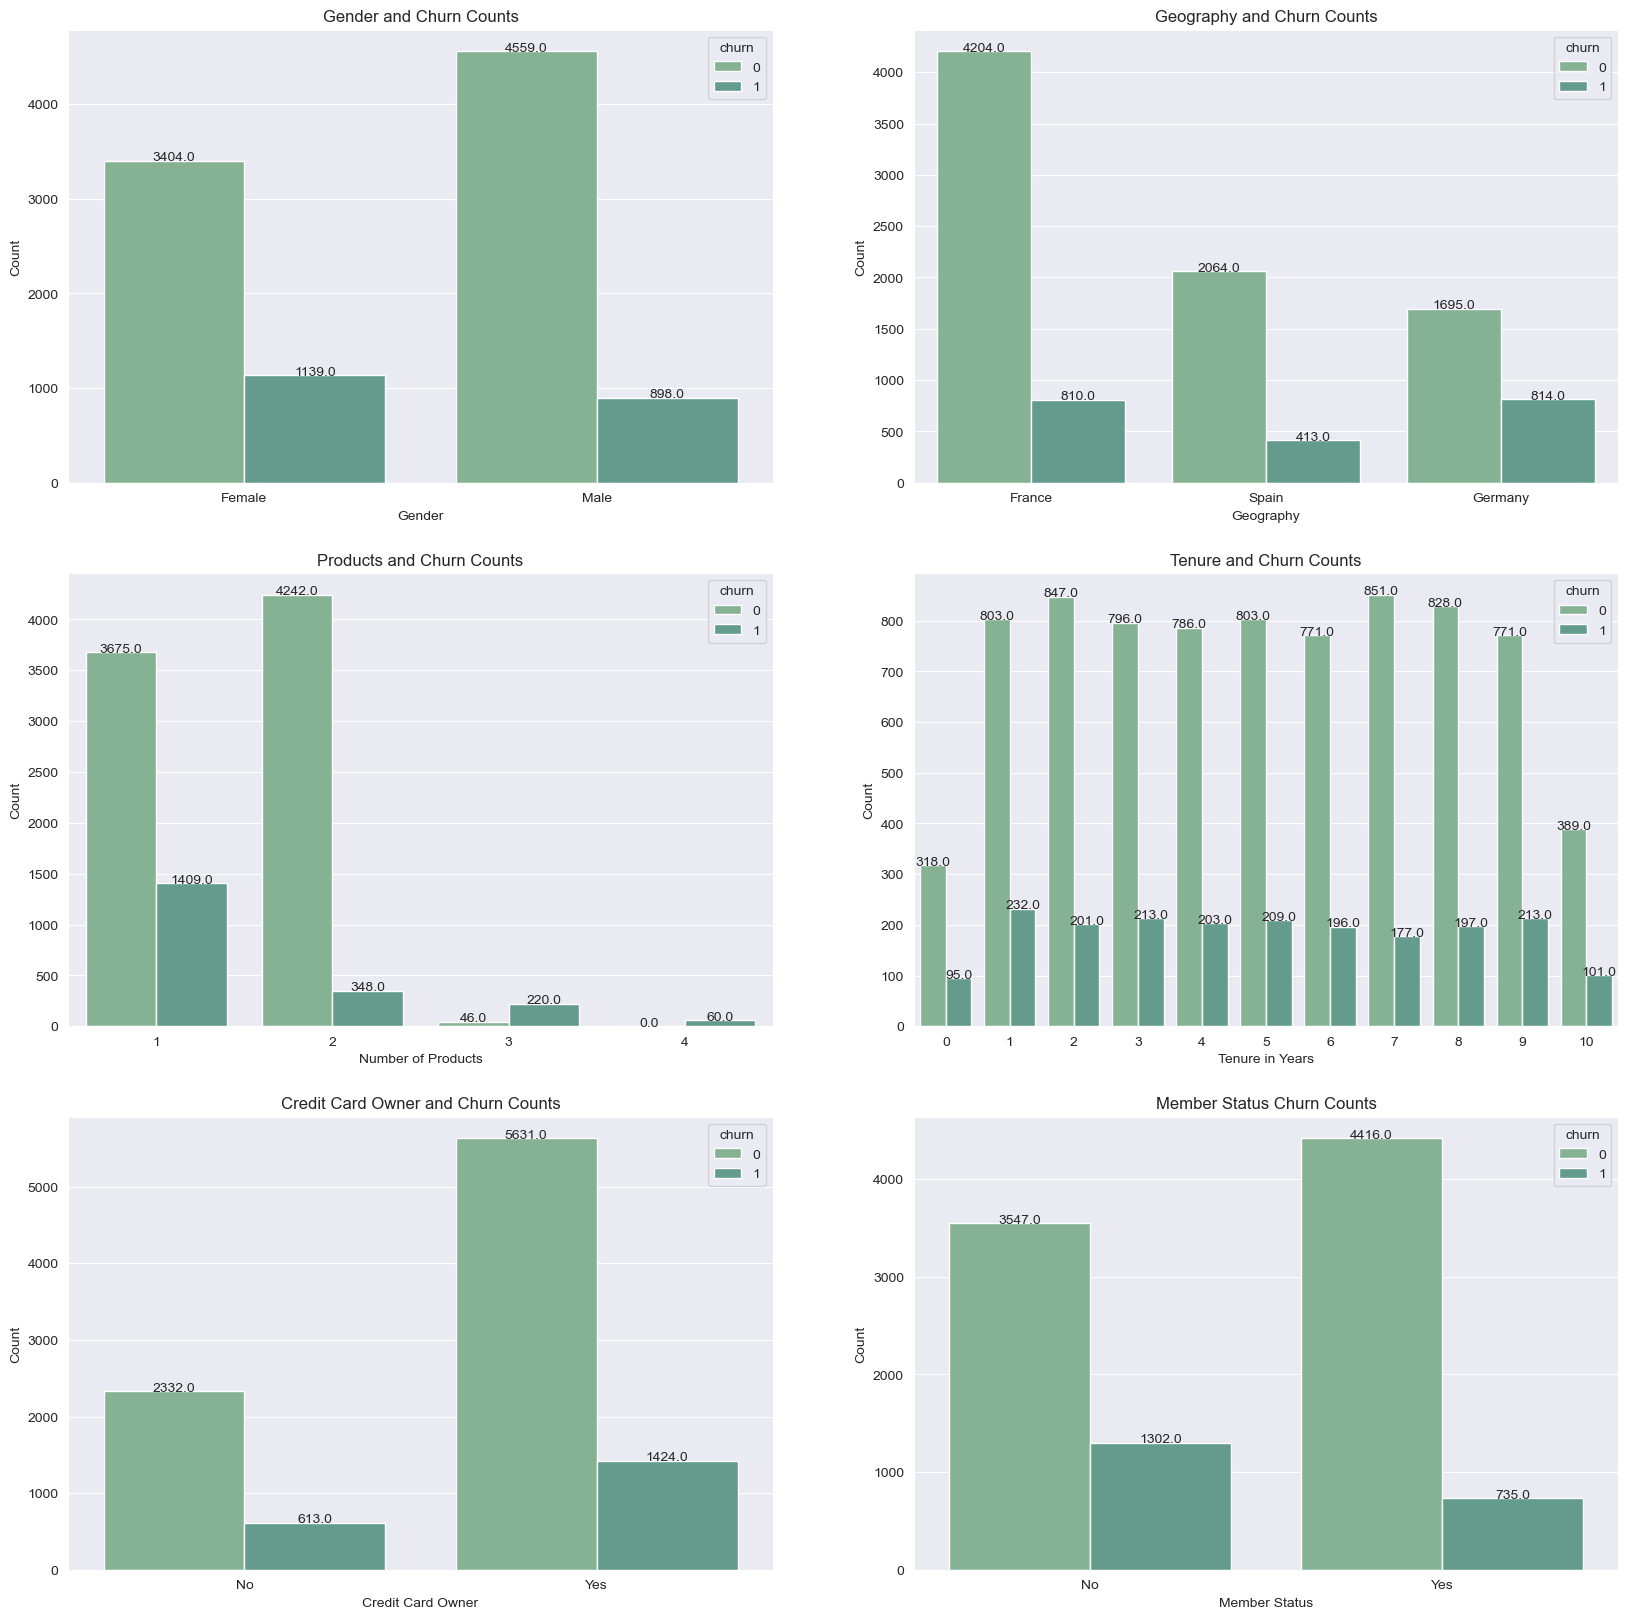

In [21]:
fig2, ax2 = plt.subplots(nrows=3, ncols=2, figsize = (20,20))

plt.subplots_adjust(hspace=0.2)

plt.subplot(3, 2, 1)

ax3 = sns.countplot(data = churn, x = 'gender', hue = 'churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender and Churn Counts')

for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width()/2., height + 0.1, f'{height}', ha="center")
    

plt.subplot(3, 2, 2)

ax4 = sns.countplot(data = churn, x = 'country', hue = 'churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geography and Churn Counts')

for p in ax4.patches:
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width()/2., height + 0.1, f'{height}', ha="center")

plt.subplot(3, 2, 3)

ax7 = sns.countplot(data = churn, x = 'number_of_products', hue = 'churn')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Products and Churn Counts')

for p in ax7.patches:
    height = p.get_height()
    ax7.text(p.get_x() + p.get_width()/2., height + 0.1, f'{height}', ha="center")
    
plt.subplot(3, 2, 4)

ax8 = sns.countplot(data = churn, x = 'tenure_years', hue = 'churn')
plt.xlabel('Tenure in Years')
plt.ylabel('Count')
plt.title('Tenure and Churn Counts')

for p in ax8.patches:
    height = p.get_height()
    ax8.text(p.get_x() + p.get_width()/2., height + 0.1, f'{height}', ha="center")
    
plt.subplot(3, 2, 5)

ax10 = sns.countplot(data = churn, hue = 'churn', x = 'credit_card')
plt.title('Credit Card Owner and Churn Counts')
plt.xlabel('Credit Card Owner')
plt.xticks([0,1],['No', 'Yes'])
plt.ylabel('Count')

for p in ax10.patches:
    height = p.get_height()
    ax10.text(p.get_x() + p.get_width()/2., height + 0.1, f'{height}', ha="center")

plt.subplot(3, 2, 6)

ax11 = sns.countplot(data = churn, hue = 'churn', x = 'active_member')
plt.title('Member Status Churn Counts')
plt.xlabel('Member Status')
plt.xticks([0,1],['No', 'Yes'])
plt.ylabel('Count')

for p in ax11.patches:
    height = p.get_height()
    ax11.text(p.get_x() + p.get_width()/2., height + 0.1, f'{height}', ha="center")
    
plt.savefig('GridPlot.png',bbox_inches = 'tight', pad_inches = 1)

Churn imbalance appears in favor of males, with a higher number of women churning in total and a greater proportion of women churning when compared to the total.

33.4% of female customers have churned, while only 19.6% of male customers have. A 70% increase. In this dataset, female customers are 70% more likely to churn than male customers.

It appears Germany also has a higher churn imbalance than France and Spain. A greater proportion of customers in Germany have churned when compared to the total number of customers in the country. Germany also has the highest total number of churned customers at 814.

48% of all customers in Germany have churned, while only 20% have from Spain, and 19.2% have from France. What's happening in Germany to drive this massive imbalance?

We see more imbalances between the number of products a customer has and churn status. There isn't much data on customers with three and four products (although the imbalance on the data we do have is clear), and on products one and two, we observe a larger imbalance of churn across customers with one product compared to customers with two.

Tenure appears fairly stable, with most customers churning after one year, but the balance remains stable at a high level.

The balance within owning a credit card and churn appears close. 

There is an imbalance between member status and churn. Customers who are not member churn 36.7% of the time, while customers who are members churn only 16.6% of the time. 

Let's examine the number of products feature closer. 

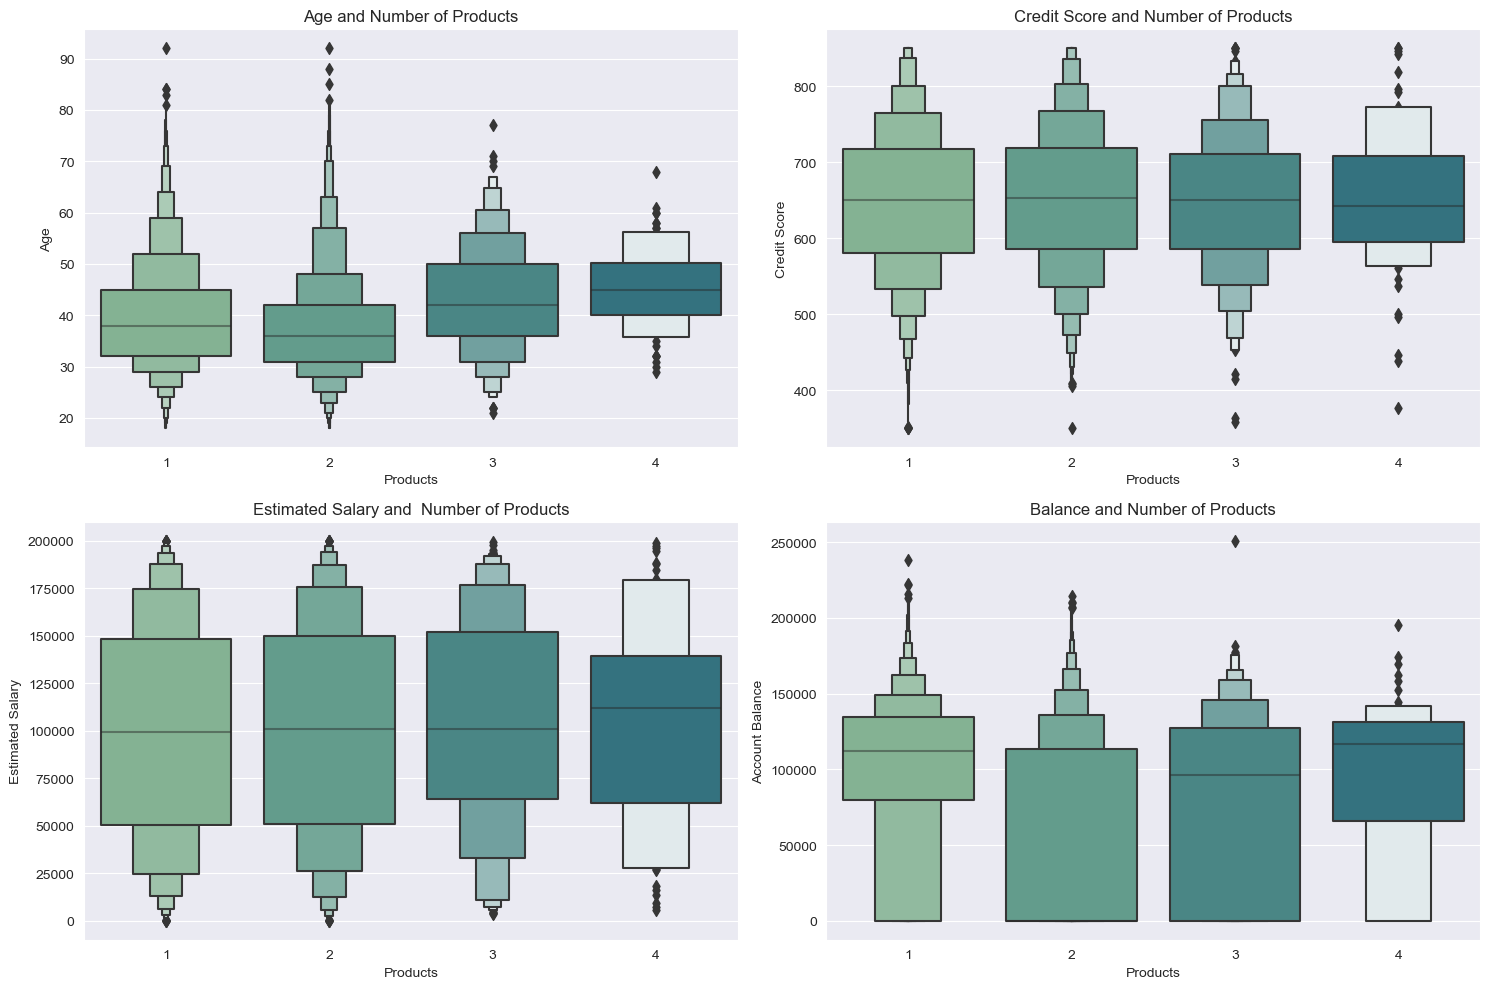

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15,10))

plt.subplots_adjust(hspace=0.2, wspace=0.25)

plt.subplot(2,2,  1)
sns.boxenplot(data = churn, x = 'number_of_products', y='age')
plt.xlabel('Products')
plt.ylabel('Age')
plt.title('Age and Number of Products')


plt.subplot(2, 2, 2)

sns.boxenplot(data = churn,x = 'number_of_products',y='credit_score')
plt.xlabel('Products')
plt.ylabel('Credit Score')
plt.title('Credit Score and Number of Products');

plt.subplot(2, 2, 3)
sns.boxenplot(data = churn,x = 'number_of_products',y='estimated_salary')
plt.xlabel('Products')
plt.ylabel('Estimated Salary')
plt.title('Estimated Salary and  Number of Products')


plt.subplot(2, 2, 4)
sns.boxenplot(data = churn,x = 'number_of_products',y='balance')
plt.xlabel('Products')
plt.ylabel('Account Balance')
plt.title('Balance and Number of Products')

fig.tight_layout()

1. As number of products goes up, so too does median age. 

2. As Number of products goes up, so too does median estimated salary, although to a lesser degree than age.

3. Credit Scores appear similar across all product groups.

4. Balance is all over the place. Number of products does appear to affect balance, but the relationship appears random. 

In [19]:
fig = px.parallel_coordinates(churn,color="age", 
                              labels={"credit_score": "Credit Score",
                                      "age": "Age", 
                                      "tenure": "Tenure",
                                      "balance": "Balance",
                                      "number_of_products": "Products",
                                      "credit_card": "CCard",
                                      "active_member": "Active Member",
                                      "estimated_salary": "Salary", 
                                      "churn": "Churn"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In an effort to have as much of an understanding of which features most impact churn I created this parallel coordinates map although I'm not exactly sure how to interpret it. I'll probably remove it, but I'd like to discuss it live with you. 

I will call EDA here. To summarize: 

50.14% of our data comes from French customers, 25.09% of our data comes from German customers, and 24.77% of our data comes from Spanish customers.

The dataset contains many binary variables, such as 'credit_card' (0 or 1), 'active_member', and our targer 'churn'. 

The 'balance' variable shows a high imbalance for customers with no money and a normal distribution for those with money.

'Age' and 'credit_score' appear approximately normal, with 'age' having a slight left skew and 'credit_score' biased a tad toward higher values. 'Tenure' is evenly distributed, and most customers have one or two bank products. However, the target variable, 'churn,' is highly imbalanced.


## Churn Imbalance:

1. Churn imbalance favors males, with a higher total number of women churning and a greater proportion of women churning compared to the total.
2. Churn rates: 33.4% for females and 19.6% for males.

## Germany's Churn Imbalance:

1. Germany exhibits a higher churn imbalance than France and Spain.
2. Proportionally, more customers in Germany have churned compared to the total, with the highest total number of churned customers (814).
3. Churn rates: 48% in Germany, 20% in Spain, and 19.2% in France.

## Product-Related Imbalances:

1. There are imbalances observed in the number of products owned by customers and their churn status.
2. Limited data on customers with three and four products, but a clear imbalance exists.
3. Larger churn imbalance across customers with one product compared to those with two.

## Tenure Stability:

1. Tenure appears stable, with most customers churning after one year, but the overall balance remains at a high level.

## Member Status and Churn:

1. There is an imbalance between member status and churn, with non-members churning 36.7% of the time, while members churn only 16.6% of the time.